In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def create_directories(base_directory, subfolders):
    """Creates directories if they do not exist."""
    for subfolder in subfolders:
        path = os.path.join(base_directory, subfolder)
        os.makedirs(path, exist_ok=True)
        print(f"Directory created or already exists: {path}")

In [23]:
def segment_text1(frame, top_percentage=87, bottom_percentage=99):
    """
    Detects and highlights text areas of each word, using horizontal morphological closing.
    """
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to highlight text areas
    mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Define a kernel for horizontal morphological closing
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 3))  # Horizontal kernel
    
    # Apply horizontal morphological closing to connect fragmented text parts
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, horizontal_kernel)
    
    # Get frame dimensions
    height = frame.shape[0]
    
    # Define regions of interest for text detection
    top_region = int(top_percentage * height / 100)
    bottom_region = int(bottom_percentage * height / 100)
    
    # Find contours in the specified region
    contours, _ = cv2.findContours(mask[top_region:bottom_region, :], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create bounding boxes for detected contours
    bounding_boxes = [(x, y + top_region, x + w, y + h + top_region) for cnt in contours for x, y, w, h in [cv2.boundingRect(cnt)] if w > 10 and h > 10]
    
    # Sort bounding boxes based on their vertical position
    bounding_boxes.sort(key=lambda box: box[1])
    
    # Draw bounding boxes on the frame
    for x1, y1, x2, y2 in bounding_boxes:
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return frame

In [4]:
#Detects and highlights red frame
def segment_text2(frame, top_ratio=0.93, bottom_ratio=0.99):
    
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply adaptive thresholding to highlight text areas
    mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)
    # Apply morphological closing to clean up the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # Get frame dimensions
    height, width = frame.shape[:2]
    # Define offsets and regions for subtitle detection
    top_region = int(top_ratio * height)
    bottom_region = int(bottom_ratio * height)
    left_margin = int(0.13 * width)
    right_margin = int(0.87 * width)
    # Extract region of interest (ROI) for subtitles
    roi = mask[top_region:bottom_region, left_margin:right_margin]
    # Find contours in the ROI
    contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create bounding boxes for detected contours
    bounding_boxes = [(x + left_margin, y + top_region, x + w + left_margin, y + h + top_region) for cnt in contours for x, y, w, h in [cv2.boundingRect(cnt)] if w > 10 and h > 10]
    # Merge overlapping bounding boxes
    merged_boxes = []
    for box in bounding_boxes:
        merged = False
        for i, mbox in enumerate(merged_boxes):
            if box[1] < mbox[3] and box[3] > mbox[1]:
                merged_boxes[i] = (min(box[0], mbox[0]), min(box[1], mbox[1]), max(box[2], mbox[2]), max(box[3], mbox[3]))
                merged = True
                break
        if not merged:
            merged_boxes.append(box)
    for x1, y1, x2, y2 in merged_boxes:   # Draw bounding boxes on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return frame

In [5]:
def segment_text3(frame, top_ratio=0.87, bottom_ratio=0.925):
    """Detects and highlights additional areas in the frame."""
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply adaptive thresholding to highlight text areas
    mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)
    # Apply adaptive thresholding to highlight text areas
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # Get frame dimensions
    height, width = frame.shape[:2]
    # Define offsets and regions for subtitle detection
    top_region = int(top_ratio * height)
    bottom_region = int(bottom_ratio * height)
    left_margin = int(0.1 * width)
    right_margin = int(0.9 * width)
    # Extract region of interest (ROI) for subtitles
    roi = mask[top_region:bottom_region, left_margin:right_margin]
    # Find contours in the ROI
    contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create bounding boxes for detected contours
    bounding_boxes = [(x + left_margin, y + top_region, x + w + left_margin, y + h + top_region) for cnt in contours for x, y, w, h in [cv2.boundingRect(cnt)] if w > 10 and h > 10]
    # Merge overlapping bounding boxes
    merged_boxes = []
    for box in bounding_boxes:
        merged = False
        for i, mbox in enumerate(merged_boxes):
            if box[1] < mbox[3] and box[3] > mbox[1]:
                merged_boxes[i] = (min(box[0], mbox[0]), min(box[1], mbox[1]), max(box[2], mbox[2]), max(box[3], mbox[3]))
                merged = True
                break
        if not merged:
            merged_boxes.append(box)
    for x1, y1, x2, y2 in merged_boxes:# Draw bounding boxes on the fram
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return frame

In [24]:
# read video
video_filename = 'video.mp4'
video_path = os.path.join('', video_filename)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"Error opening video file: {video_path}")
    exit()

In [ ]:

# Define base directory and subfolders
base_directory = '/IMAGE'
subfolders = ['frames', 'processing-frames', 'segmented-frames']

# Create the necessary directories
create_directories(base_directory, subfolders)

output_folder = os.path.join(base_directory, subfolders[0])
processed_folder = os.path.join(base_directory, subfolders[1])
segmented_folder = os.path.join(base_directory, subfolders[2])

frame_idx = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    original_frame_path = f"{output_folder}/frame_{frame_idx:04d}.jpg"
    cv2.imwrite(original_frame_path, frame)

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame_path = f"{processed_folder}/gray_frame_{frame_idx:04d}.jpg"
    cv2.imwrite(gray_frame_path, gray_frame)

    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
    blurred_frame_path = f"{processed_folder}/blurred_frame_{frame_idx:04d}.jpg"
    cv2.imwrite(blurred_frame_path, blurred_frame)

    _, binary_frame = cv2.threshold(blurred_frame, 127, 255, cv2.THRESH_BINARY)
    binary_frame_path = f"{processed_folder}/thresholded_frame_{frame_idx:04d}.jpg"
    cv2.imwrite(binary_frame_path, binary_frame)

    segmented_frame = segment_text1(frame)
    segmented_frame = segment_text2(segmented_frame)
    segmented_frame = segment_text3(segmented_frame)

    segmented_frame_path = f"{segmented_folder}/segmented_frame_{frame_idx:04d}.jpg"
    cv2.imwrite(segmented_frame_path, segmented_frame)

    frame_idx += 1

cap.release()

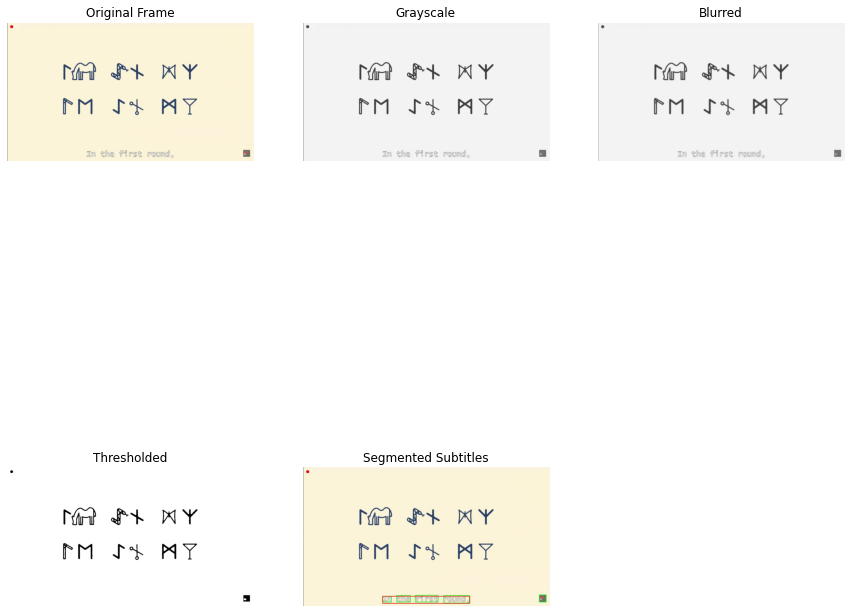

In [9]:
# Show examples of each preprocessing and segmentation step for a single frame
sample_frame_idx = 1123
original_frame = cv2.imread(f"{output_folder}/frame_{sample_frame_idx:04d}.jpg")
gray_frame = cv2.imread(f"{processed_folder}/gray_frame_{sample_frame_idx:04d}.jpg")
blurred_frame = cv2.imread(f"{processed_folder}/blurred_frame_{sample_frame_idx:04d}.jpg")
thresholded_frame = cv2.imread(f"{processed_folder}/thresholded_frame_{sample_frame_idx:04d}.jpg")
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(15, 15))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB))
plt.title("Original Frame")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray_frame, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(blurred_frame, cmap='gray')
plt.title("Blurred")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(thresholded_frame, cmap='gray')
plt.title("Thresholded")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()



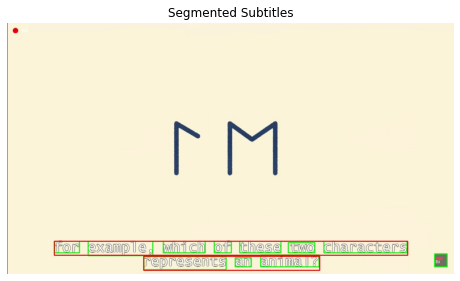

In [10]:
import cv2
import matplotlib.pyplot as plt

sample_frame_idx = 428
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

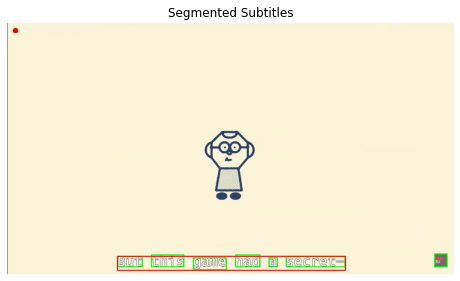

In [11]:
sample_frame_idx = 898
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

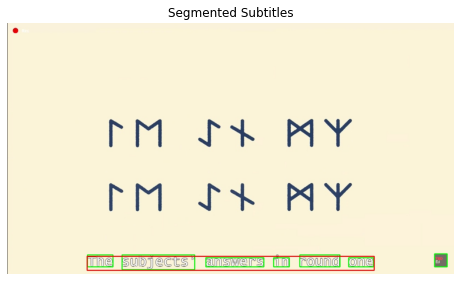

In [12]:
sample_frame_idx = 1002
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

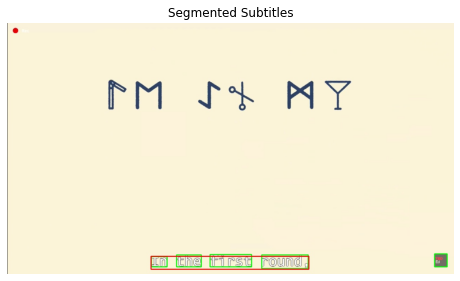

In [13]:
sample_frame_idx = 1135
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

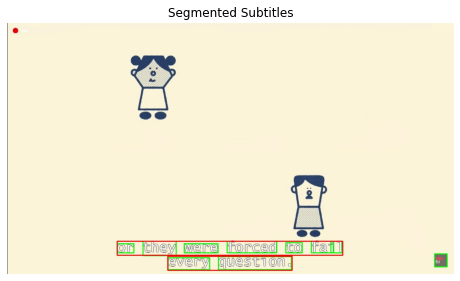

In [14]:
sample_frame_idx = 1326
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

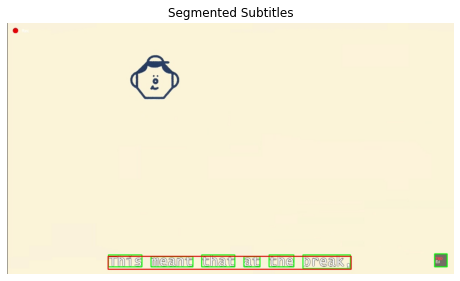

In [15]:
sample_frame_idx = 1411
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

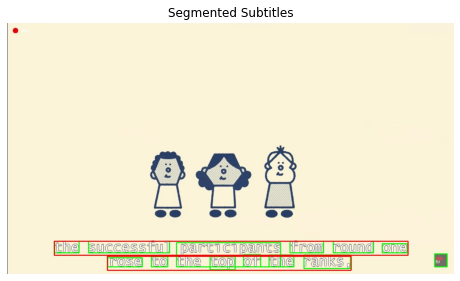

In [16]:
sample_frame_idx = 1723
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

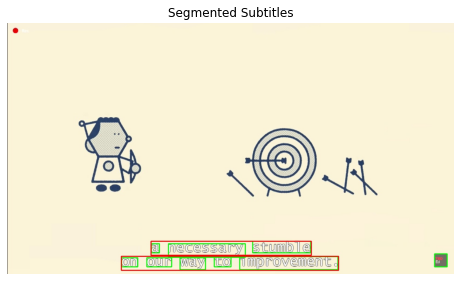

In [17]:
sample_frame_idx = 2190
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

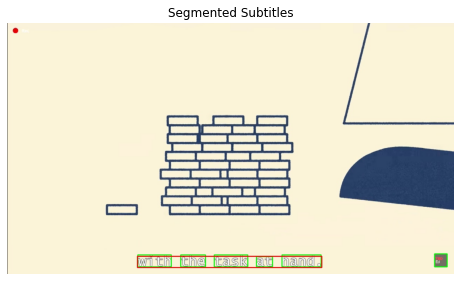

In [18]:
sample_frame_idx = 4124
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

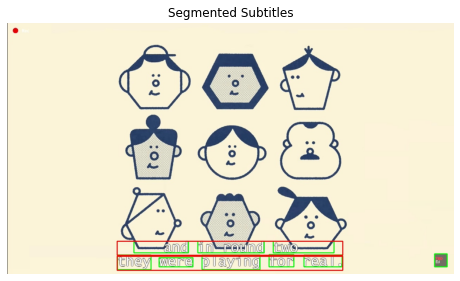

In [19]:
sample_frame_idx = 1590
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

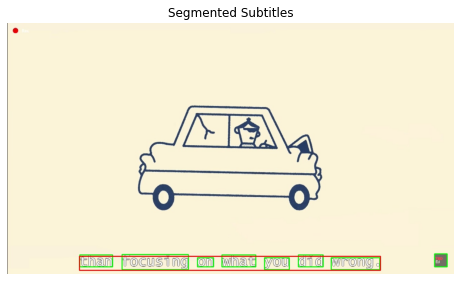

In [20]:
sample_frame_idx = 7832
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

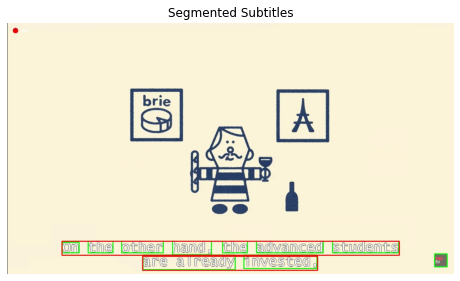

In [21]:
sample_frame_idx = 5611
segmented_frame = cv2.imread(f"{segmented_folder}/segmented_frame_{sample_frame_idx:04d}.jpg")

plt.figure(figsize=(8, 8))

plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))
plt.title("Segmented Subtitles")
plt.axis('off')

plt.show()

In [22]:
# Create video from segmented frames
segmented_frames_folder = os.path.join(base_directory, subfolders[2])
segmented_filenames = sorted(os.listdir(segmented_frames_folder))

output_video_filename = os.path.join(base_directory, 'output_video.mp4')

first_frame = cv2.imread(os.path.join(segmented_frames_folder, segmented_filenames[0]))
height, width, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_video_filename, fourcc, 30, (width, height))

for filename in segmented_filenames:
    frame_path = os.path.join(segmented_frames_folder, filename)
    frame = cv2.imread(frame_path)
    output_video.write(frame)

output_video.release()

print(f"Video created successfully: {output_video_filename}")


Video created successfully: /IMAGE\output_video.mp4
